In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

https://www.google.com/search?client=safari&rls=en&q=yeo+johnson+transformation&ie=UTF-8&oe=UTF-8

## Loading the dataset ...

In [2]:
df = pd.read_excel('ML_Acc_Dec_Datasetsample.xlsx')
df.head()

SNo  SubjID  SubjType  Time  StrictLeaderType  SideLeader Right  \
0    5       7         1    15                 1                 0   
1    7      10         1    16                 1                 0   
2    9      11         1    13                 1                 0   
3   12      13         1    17                 1                 0   
4   13      14         1    12                 1                 0   

   SideLeader Left       Acc          V        Gap    DeltaV Category  \
0                0  0.753801  12.549357  11.503159  0.091850        1   
1                0  2.656502  11.684158   6.134527  4.807924        1   
2                0  1.668593  12.310612   8.152329  0.389053        1   
3                0  1.257824  12.986008  12.443832  2.004326        1   
4                0  1.829174  11.325309   3.792806  4.808758        1   

   Regimes  AccGapWiden  
0      2.0            1  
1      4.0            1  
2      5.0            1  
3      2.0            1  
4      4.0            1

### Dataset Information

- Response variable is **Acceleration**
- Independent variables data definition are as follows
- id : vehicle id
- subjtype - 1 (tw), 2 car
- strict leader type: 1 tw, 2 car, 3+ other
- Sideleader type: 1 tw, 2 car, 3+ other
- log acc is log of **acceleration** 
- log abs speed is log of speed of subj vehicle
- log S is log of spacing between leader and follower
- log deltav is log of speed difference between follower and leader

In [3]:
df.Category.value_counts()

1              2086
Cat1_NoLead    1556
3               783
2               727
Cat2_Right      606
Cat3_Left       578
5               173
Cat5_Both       161
Name: Category, dtype: int64

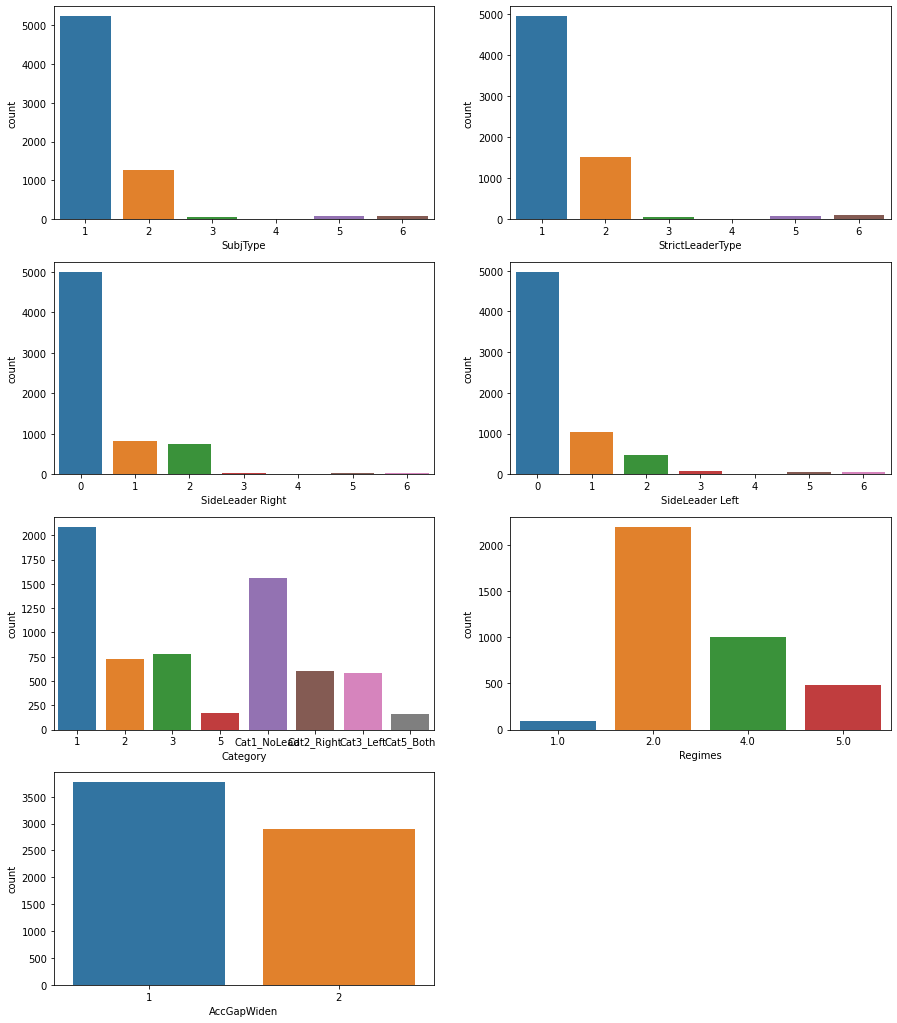

In [4]:
cat_cols = ['SubjType', 'StrictLeaderType','SideLeader Right', 'SideLeader Left',
            'Category', 'Regimes', 'AccGapWiden']

plt.figure(figsize=(15,18))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(df[cat_cols[i]])

<AxesSubplot:xlabel='Category', ylabel='count'>

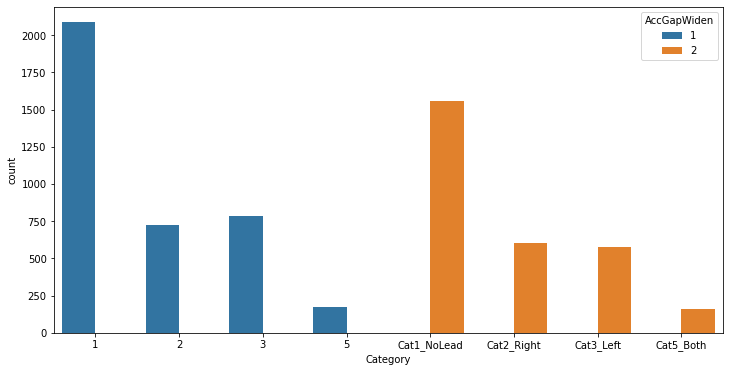

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['Category'],hue=df['AccGapWiden'])

In [6]:
df1 = df[['SubjType','StrictLeaderType','Category','AccGapWiden','Acc','V','Gap','DeltaV']]
df1.columns = ['Type','SLType','Category','AccGapWiden','Acc','AbsSpd','S','DeltaV']
df1.head()

Type  SLType Category  AccGapWiden       Acc     AbsSpd          S  \
0     1       1        1            1  0.753801  12.549357  11.503159   
1     1       1        1            1  2.656502  11.684158   6.134527   
2     1       1        1            1  1.668593  12.310612   8.152329   
3     1       1        1            1  1.257824  12.986008  12.443832   
4     1       1        1            1  1.829174  11.325309   3.792806   

     DeltaV  
0  0.091850  
1  4.807924  
2  0.389053  
3  2.004326  
4  4.808758

In [7]:
df.Category.value_counts()

1              2086
Cat1_NoLead    1556
3               783
2               727
Cat2_Right      606
Cat3_Left       578
5               173
Cat5_Both       161
Name: Category, dtype: int64

In [8]:
# df_wid = df1[df1['AccGapWiden']==1]
# df_nar = df1[df1['AccGapWiden']==2]

In [9]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df1, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df1, x = col_list[i], y = 'Acc')

In [10]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_nar, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_nar, x = col_list[i], y = 'Acc')

In [11]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_wid, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_wid, x = col_list[i], y = 'Acc')

In [12]:
df1.shape

(6670, 8)

In [13]:
def vehicle_type(x):
    if x == 1:
        return 'TW'
    elif x == 2:
        return 'Car'
    else:
        return 'Other'
def Catgory(x):
    if x == 1:
        return 'Cat1_NoLead'
    elif x == 2:
        return 'Cat2_Right'
    elif x == 3:
        return 'Cat3_Left'
    elif x == 5:
        return 'Cat5_Both'
    else:
        return x

def cat_name(x):
    x = str(x)
    return str(x[5:])

def AccGap(x):
    if x == 1:
        return 'Widening'
    else:
        return 'Narrowing'

In [14]:
df1['Type'] = df1['Type'].apply(vehicle_type)
df1['SLType']= df1['SLType'].apply(vehicle_type)
df1['Category'] = df1['Category'].apply(Catgory)
df1['AccGapWiden'] = df1['AccGapWiden'].apply(AccGap)

In [15]:
df1['Category'] = df1['Category'].apply(cat_name)

In [16]:
df1.Category.value_counts()

NoLead    3642
Left      1361
Right     1333
Both       334
Name: Category, dtype: int64

In [17]:
df1.head()

Type SLType Category AccGapWiden       Acc     AbsSpd          S    DeltaV
0   TW     TW   NoLead    Widening  0.753801  12.549357  11.503159  0.091850
1   TW     TW   NoLead    Widening  2.656502  11.684158   6.134527  4.807924
2   TW     TW   NoLead    Widening  1.668593  12.310612   8.152329  0.389053
3   TW     TW   NoLead    Widening  1.257824  12.986008  12.443832  2.004326
4   TW     TW   NoLead    Widening  1.829174  11.325309   3.792806  4.808758

In [18]:
df1 = pd.get_dummies(df1,prefix=None, prefix_sep='-',sparse=False, drop_first=False)

df1.columns

Index(['Acc', 'AbsSpd', 'S', 'DeltaV', 'Type-Car', 'Type-Other', 'Type-TW',
       'SLType-Car', 'SLType-Other', 'SLType-TW', 'Category-Both',
       'Category-Left', 'Category-NoLead', 'Category-Right',
       'AccGapWiden-Narrowing', 'AccGapWiden-Widening'],
      dtype='object')

In [19]:
df1.drop(['Type-Other','SLType-Other','Category-Both','AccGapWiden-Narrowing'],axis=1,inplace=True)

df1.head()

Acc     AbsSpd          S    DeltaV  Type-Car  Type-TW  SLType-Car  \
0  0.753801  12.549357  11.503159  0.091850         0        1           0   
1  2.656502  11.684158   6.134527  4.807924         0        1           0   
2  1.668593  12.310612   8.152329  0.389053         0        1           0   
3  1.257824  12.986008  12.443832  2.004326         0        1           0   
4  1.829174  11.325309   3.792806  4.808758         0        1           0   

   SLType-TW  Category-Left  Category-NoLead  Category-Right  \
0          1              0                1               0   
1          1              0                1               0   
2          1              0                1               0   
3          1              0                1               0   
4          1              0                1               0   

   AccGapWiden-Widening  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [20]:
df1.columns

Index(['Acc', 'AbsSpd', 'S', 'DeltaV', 'Type-Car', 'Type-TW', 'SLType-Car',
       'SLType-TW', 'Category-Left', 'Category-NoLead', 'Category-Right',
       'AccGapWiden-Widening'],
      dtype='object')

In [21]:
df1[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right','AccGapWiden-Widening']] = df1[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right','AccGapWiden-Widening']].astype('int64')


In [22]:
df1.dtypes

Acc                     float64
AbsSpd                  float64
S                       float64
DeltaV                  float64
Type-Car                  int64
Type-TW                   int64
SLType-Car                int64
SLType-TW                 int64
Category-Left             int64
Category-NoLead           int64
Category-Right            int64
AccGapWiden-Widening      int64
dtype: object

In [23]:
df1.describe()

Acc       AbsSpd            S       DeltaV     Type-Car  \
count  6670.000000  6670.000000  6670.000000  6670.000000  6670.000000   
mean      0.096033    12.381725    13.051821     0.215100     0.188756   
std       1.737393     2.490488     7.483819     2.419010     0.391344   
min      -4.800000     0.236683     0.017779   -10.770259     0.000000   
25%      -0.974690    10.724165     6.990494    -1.329660     0.000000   
50%       0.250188    12.261257    11.843736     0.341681     0.000000   
75%       1.182439    13.914998    18.352384     1.721607     0.000000   
max       4.800000    22.725387    29.995978     9.308112     1.000000   

           Type-TW   SLType-Car    SLType-TW  Category-Left  Category-NoLead  \
count  6670.000000  6670.000000  6670.000000    6670.000000      6670.000000   
mean      0.783808     0.225637     0.740930       0.204048         0.546027   
std       0.411678     0.418033     0.438157       0.403034         0.497914   
min       0.000000     0.000000     0.000000       0.000000         0.000000   
25%       1.000000     0.000000     0.000000       0.000000         0.000000   
50%       1.000000     0.000000     1.000000       0.000000         1.000000   
75%       1.000000     0.000000     1.000000       0.000000         1.000000   
max       1.000000     1.000000     1.000000       1.000000         1.000000   

       Category-Right  AccGapWiden-Widening  
count     6670.000000           6670.000000  
mean         0.199850              0.565067  
std          0.399917              0.495785  
min          0.000000              0.000000  
25%          0.000000              0.000000  
50%          0.000000              1.000000  
75%          0.000000              1.000000  
max          1.000000              1.000000

## Refernce:
- https://www.scikit-yb.org/en/latest/api/regressor/influence.html
- https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

## Removing unreasonable combinations of features

In [24]:
# Widening
df1['ColTime'] = df1['S']/df1['DeltaV']

Coll_time_index = df1[abs(df1['ColTime'])<0.9].index
c1_index = df1[(abs(df1['DeltaV']) < 0.6) & (abs(df1['Acc']) > 2.27)].index
c2_index = df1[(abs(df1['DeltaV']) > 3.06) & (abs(df1['Acc']) < 0.44)].index

set1 = set(Coll_time_index)
set2 = set(c1_index)
set3 = set(c2_index)

set_index = set1.union(set2.union(set3))
final_index = list(set_index)
print(len(final_index))
print(df1.shape)
df1.drop(final_index, axis=0,inplace=True)
print(df1.shape)

437
(6670, 13)
(6233, 13)


In [25]:
df1.describe().T

count       mean         std           min        25%  \
Acc                   6233.0   0.110850    1.692609     -4.800000  -0.965827   
AbsSpd                6233.0  12.373714    2.458185      0.236683  10.733437   
S                     6233.0  13.190748    7.358492      0.317263   7.188132   
DeltaV                6233.0   0.216967    2.332679    -10.770259  -1.296391   
Type-Car              6233.0   0.192845    0.394564      0.000000   0.000000   
Type-TW               6233.0   0.778919    0.415008      0.000000   1.000000   
SLType-Car            6233.0   0.229905    0.420806      0.000000   0.000000   
SLType-TW             6233.0   0.736724    0.440446      0.000000   0.000000   
Category-Left         6233.0   0.207444    0.405509      0.000000   0.000000   
Category-NoLead       6233.0   0.542756    0.498209      0.000000   0.000000   
Category-Right        6233.0   0.200225    0.400200      0.000000   0.000000   
AccGapWiden-Widening  6233.0   0.567784    0.495424      0.000000   0.000000   
ColTime               6233.0  -9.842314  836.992189 -48779.811684  -5.670876   

                            50%        75%          max  
Acc                    0.284725   1.186855     4.800000  
AbsSpd                12.252747  13.878888    22.725387  
S                     11.997616  18.399295    29.995978  
DeltaV                 0.363838   1.683617     9.308112  
Type-Car               0.000000   0.000000     1.000000  
Type-TW                1.000000   1.000000     1.000000  
SLType-Car             0.000000   0.000000     1.000000  
SLType-TW              1.000000   1.000000     1.000000  
Category-Left          0.000000   0.000000     1.000000  
Category-NoLead        1.000000   1.000000     1.000000  
Category-Right         0.000000   0.000000     1.000000  
AccGapWiden-Widening   1.000000   1.000000     1.000000  
ColTime                2.988088   9.059331  7226.424095

In [26]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_wid, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_wid, x = col_list[i], y = 'Acc')

In [27]:
df1.to_csv("Unbinned_final.csv")
# df_nar.to_csv("narrowing.csv")